In [1]:
import pandas as pd

In [2]:
diamonds = pd.read_csv("https://github.com/PavelKilko/intelligent-systems-models/raw/master/lab-5/diamonds.csv")

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# removing column 'Unnamed:0'
diamonds.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [6]:
# adding attribute combinations
diamonds["area"] = diamonds["x"] * diamonds["y"]
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

In [7]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,area,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,15.7210,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,14.9376,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,16.4835,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,17.7660,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,18.8790,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,37.6380,140.766120
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,34.2221,124.568444
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,33.2346,115.988754
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,32.8902,112.813386


# Making plots with matplotlib

### Histograms

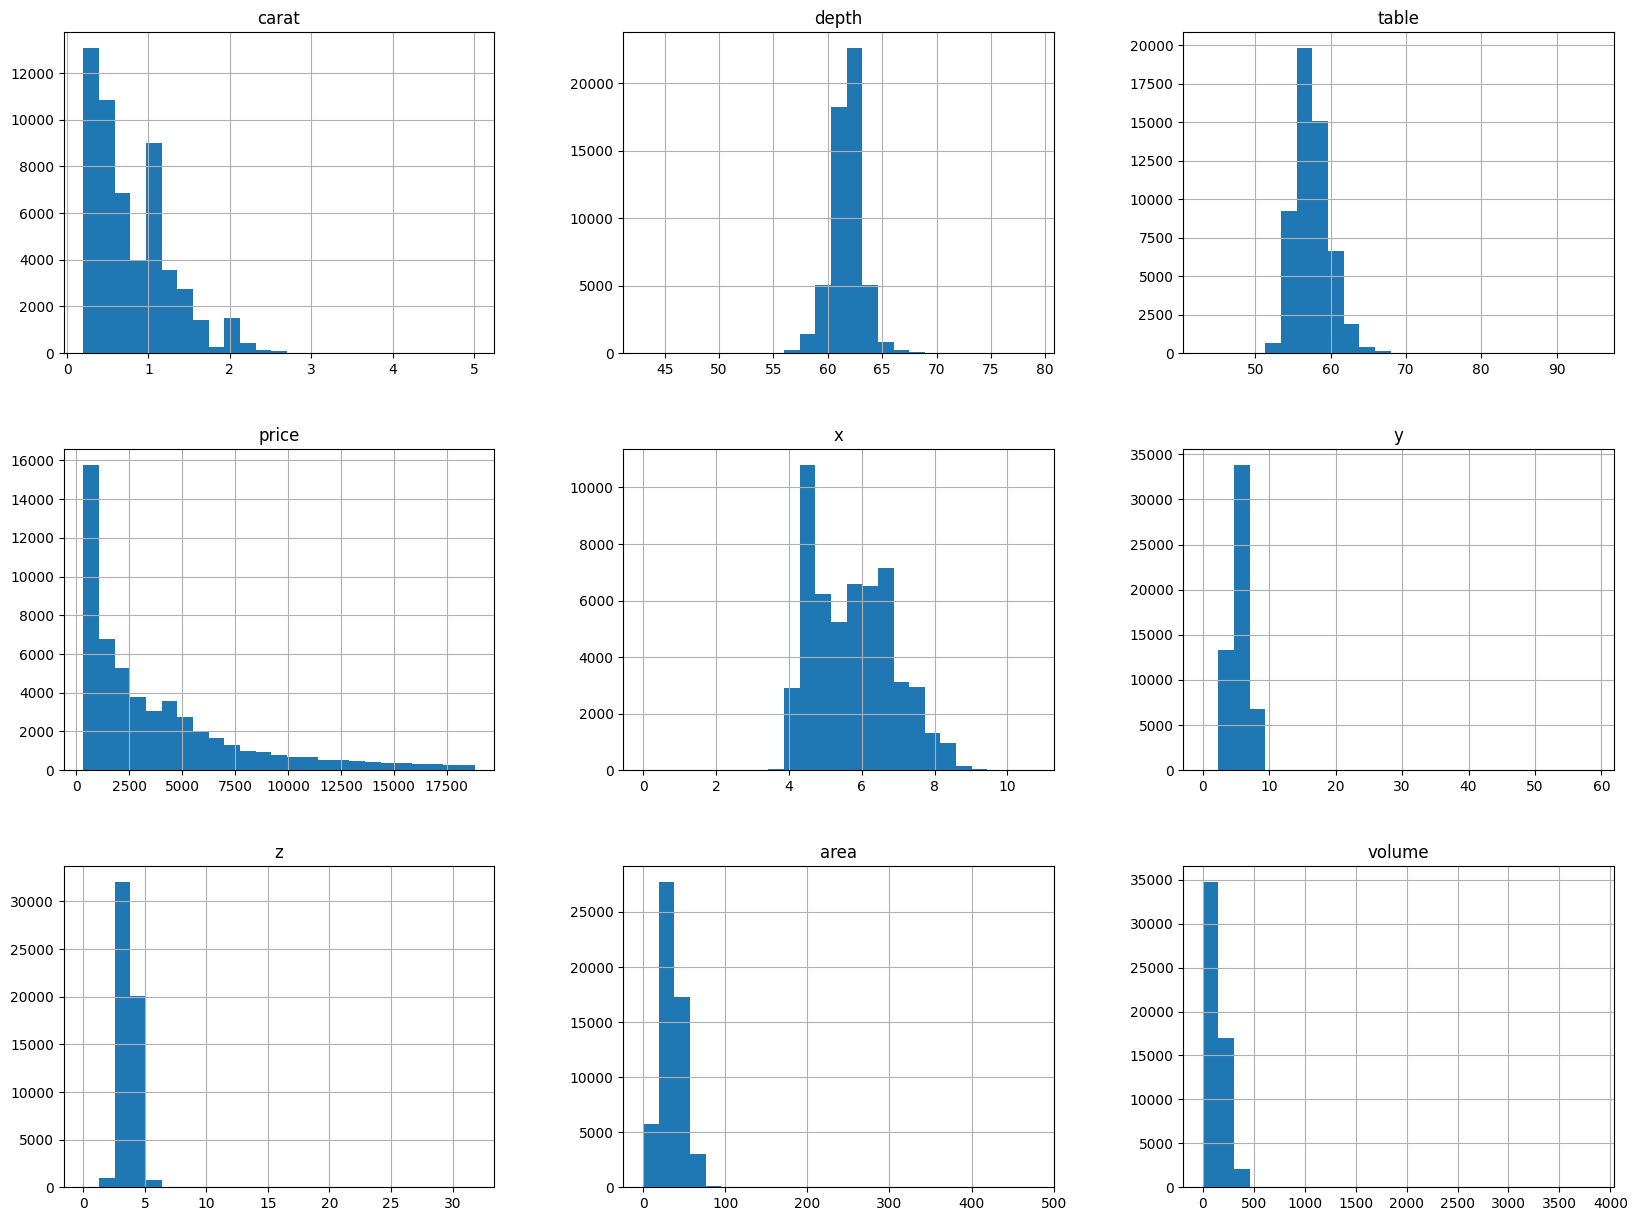

In [8]:
# check values distributions of dataset

%matplotlib inline

import matplotlib.pyplot as plt

diamonds.hist(bins=25, figsize=(20, 15))

plt.show()

In [9]:
# split dataset into test and train samples

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diamonds, test_size=0.2, random_state=42)

In [10]:
test_set.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,area,volume
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47,15.8800,39.223600
19841,1.21,Very Good,F,VS2,62.9,54.0,8403,6.78,6.82,4.28,46.2396,197.905488
41647,0.50,Fair,E,SI1,61.7,68.0,1238,5.09,5.03,3.12,25.6027,79.880424
41741,0.50,Ideal,D,SI2,62.8,56.0,1243,5.06,5.03,3.17,25.4518,80.682206
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61,54.8328,252.779208


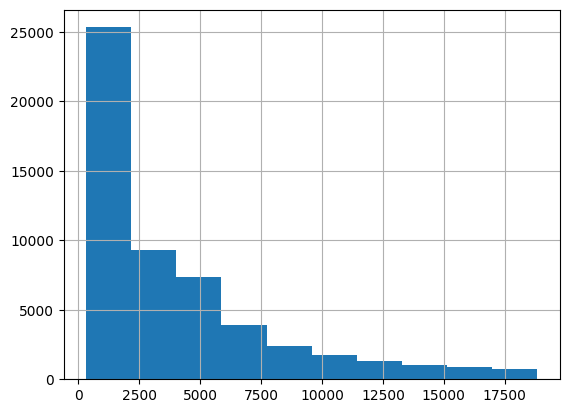

In [11]:
diamonds["price"].hist()

plt.show()

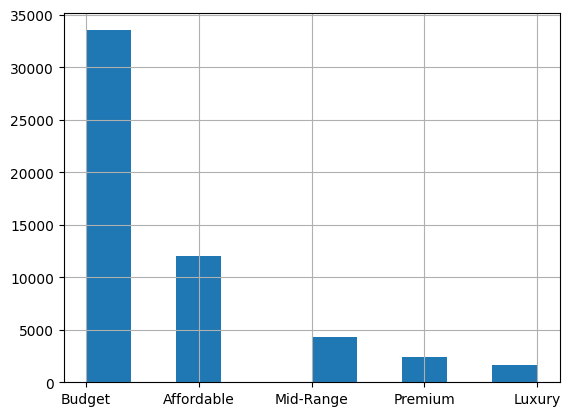

In [12]:
# Make histogram of price categories of diamonds

import numpy as np

diamonds["price_cat"] = pd.cut(diamonds["price"], bins=[0, 3750, 7500, 11250, 15000, np.inf], labels=["Budget", "Affordable", "Mid-Range", "Premium", "Luxury"])

diamonds["price_cat"].hist()

plt.show()

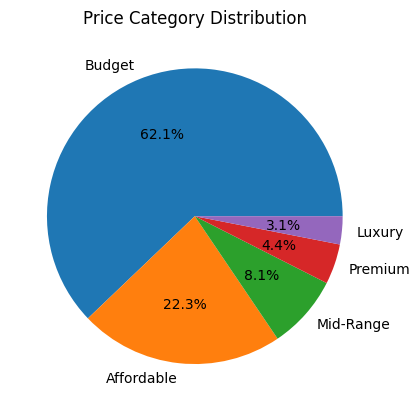

In [13]:
import matplotlib.pyplot as plt

# Create a new figure and ensure it's a 2D plot
fig, ax = plt.subplots()

# Create a pie chart
ax.pie(diamonds["price_cat"].value_counts().values, labels=diamonds["price_cat"].value_counts().index, autopct='%1.1f%%')
ax.set_title("Price Category Distribution")

plt.show()

In [14]:
# make stratified sample

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(diamonds, diamonds["price_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

### 3-D plot

<IPython.core.display.Javascript object>


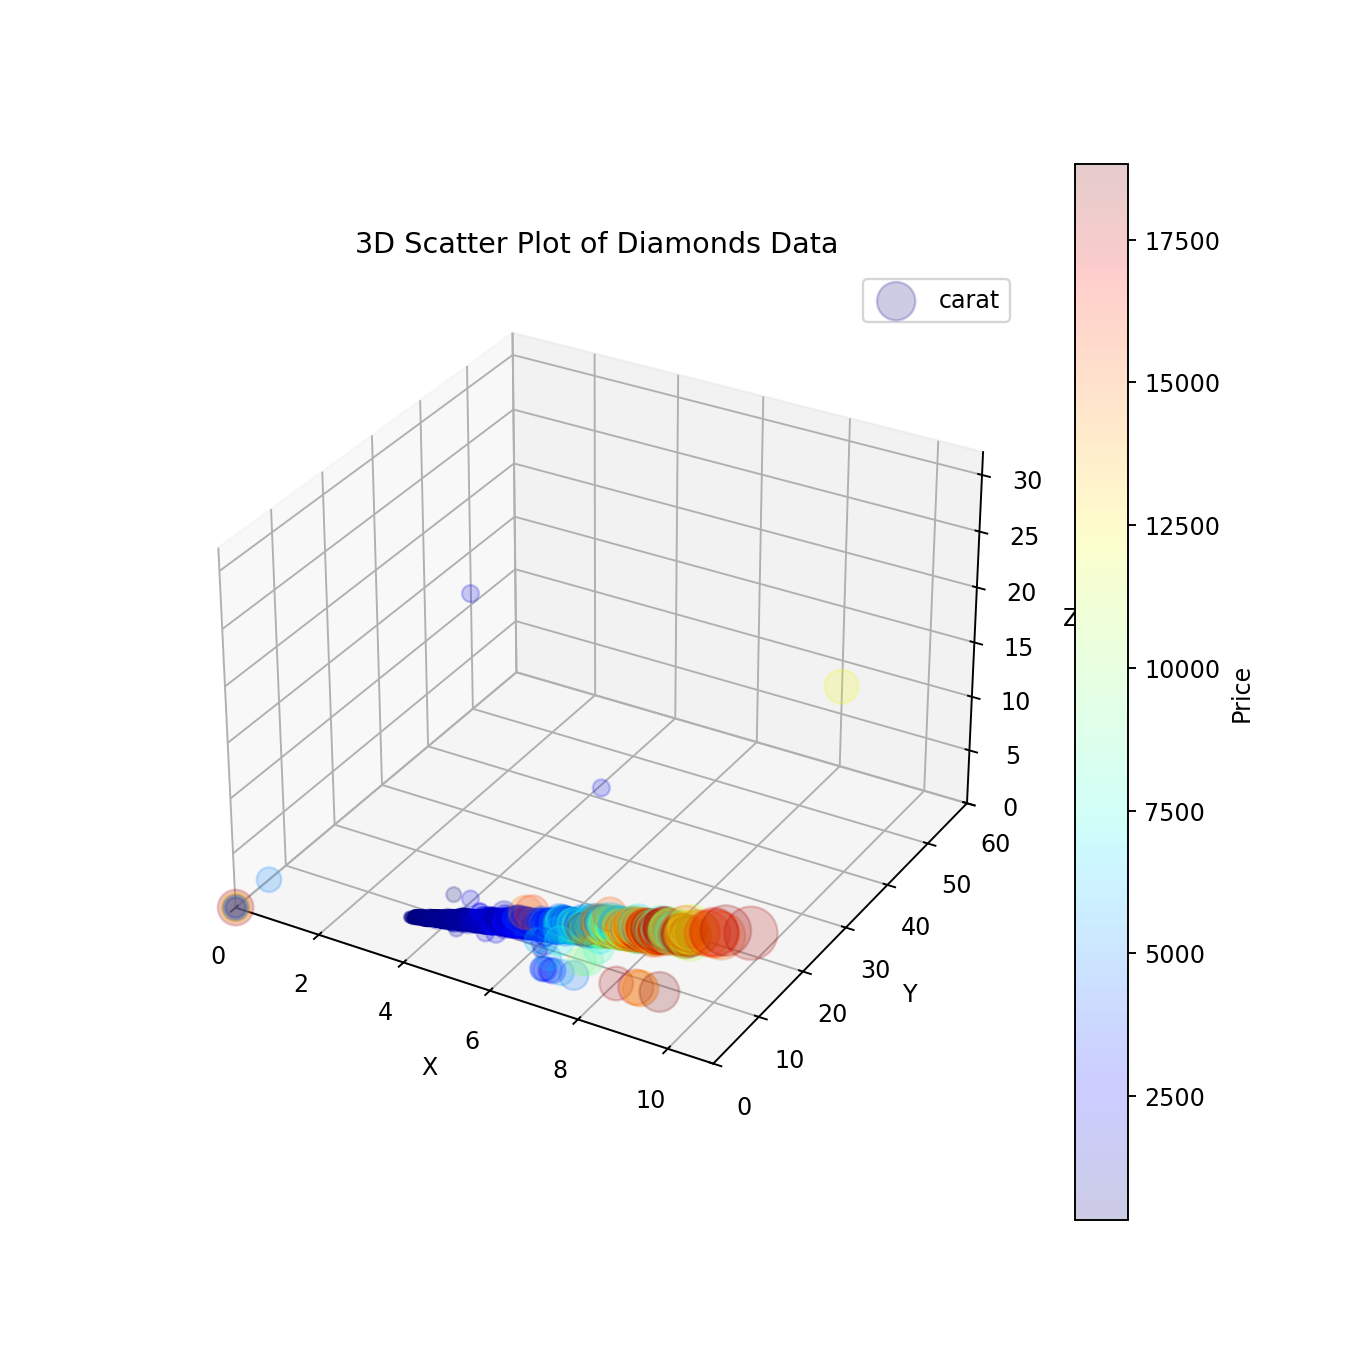

In [15]:
# visualize size data

%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(diamonds['x'], diamonds['y'], diamonds['z'], 
                     s=diamonds["carat"] * 100, label="carat",
                     c=diamonds["price"], cmap="jet", 
                     alpha=0.2)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Diamonds Data')

ax.set_xlim(0, 11)
ax.set_ylim(0, 60)
ax.set_zlim(0, 32)

cbar = fig.colorbar(scatter, ax=ax, label='Price')

plt.legend()

# Show plot
plt.show()

In [18]:
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111)

# Making plots with Seaborn

### Scatter plot

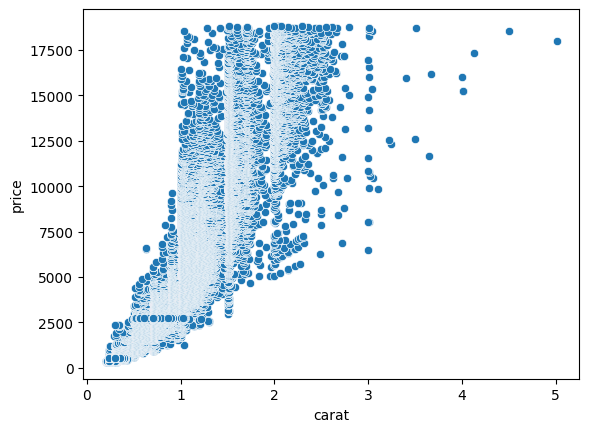

In [20]:
import seaborn as sns

sns.scatterplot(data=diamonds, x="carat", y="price")

plt.show()

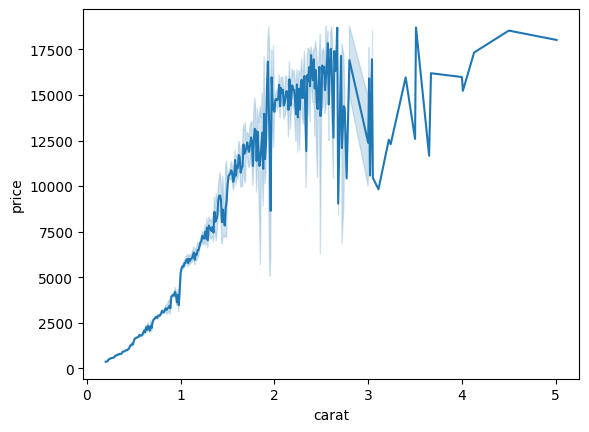

In [21]:
import seaborn as sns

sns.lineplot(data=diamonds, x="carat", y="price")

plt.show()

<IPython.core.display.Javascript object>


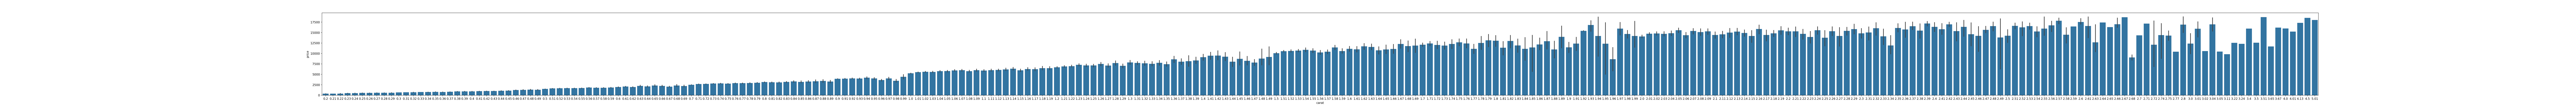

In [32]:
%matplotlib notebook

plt.figure(figsize=(120, 5))

sns.barplot(data=diamonds, x="carat", y="price")

plt.show()

In [33]:
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111)

In [34]:
diamonds["price_per_carat"] = diamonds["price"] / diamonds["carat"]

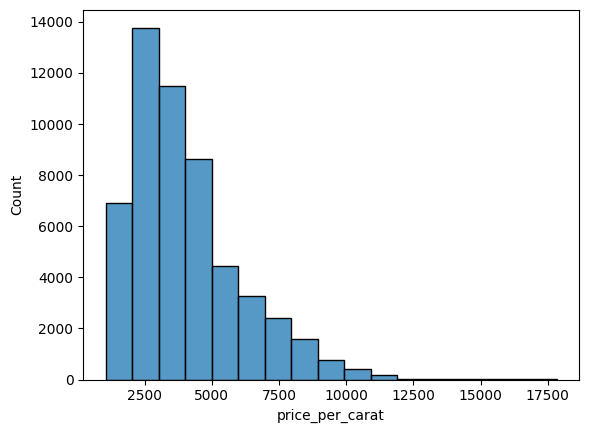

In [38]:
sns.histplot(diamonds["price_per_carat"], binwidth=1000)

plt.show()

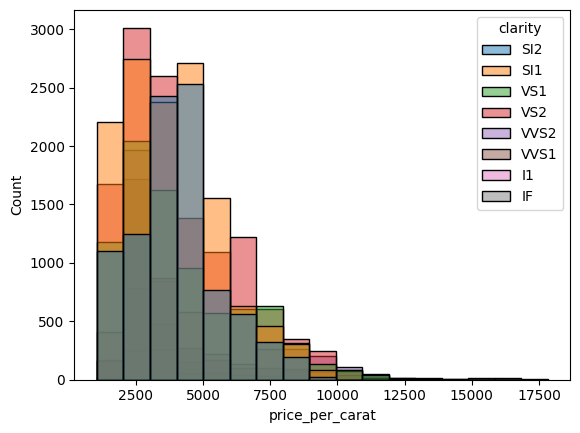

In [39]:
sns.histplot(data=diamonds, x="price_per_carat", binwidth=1000, hue="clarity")

plt.show()

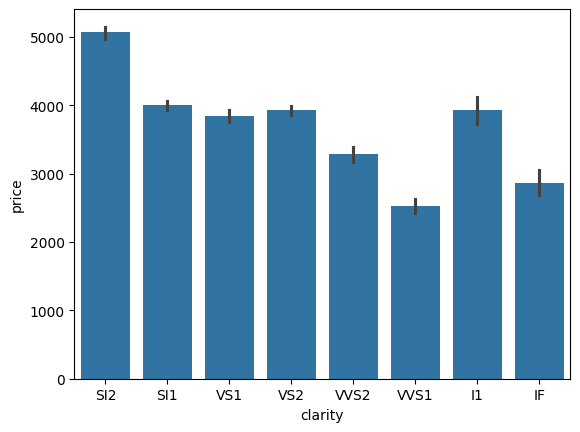

In [43]:
# Average diamond price depending on clarity

sns.barplot(data=diamonds, x="clarity", y="price", estimator=np.average)

plt.show()

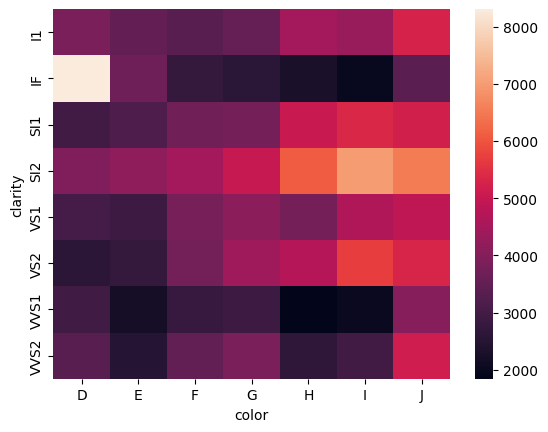

In [50]:
# How clarity and color influence on diamond average price

pivot = diamonds.pivot_table(
    index=["clarity"],
    columns=["color"],
    values="price",
    aggfunc=np.average)

sns.heatmap(pivot)

plt.show()